# Conducting T-Tests

## Introduction

Previously you learned how to construct confidence intervals using the z-distribution (standard normal distribution), then learned how to construct them using the t-distribution instead. Using the t-distribution rather than the z-distribution for constructing confidence intervals allows you to handle instances where you don't know the population standard deviation or you have a small sample size. The same is true with hypothesis testing — a t-test (using the t-distribution) can be used instead of a z-test (using the z-distribution) under these conditions.

## Objectives
You will be able to:

* Compare when you would use one sample vs. two sample t-tests
* Perform a one sample t-test and make conclusions about an experiment based on the results


## Hypothesis Testing Using the t-Distribution

Recall that in frequentist hypothesis testing, you construct a test statistic from the measured data and use the value of that statistic to decide whether to reject the null hypothesis.

The test statistic is a lower-dimensional summary of the data but still maintains the discriminatory power necessary to determine whether a result is statistically significant for a given significance level.


## t-test

t-tests (also called Student’s t-test) are very practical hypothesis tests that can be employed to compare two averages (means) to assess if they are different from each other. You should run a t-test when you either:
* Don’t know the population standard deviation 
* You have a small sample size    

Like a $z$-test, the t-test also tells you how significant the differences are i.e. it lets you know if those differences could have happened by chance. In this lesson, you will get an introduction to t-tests, in particular, the 1-sample t-test. There are additional kinds of t-tests including the 2-sample t-test and paired t-test. This lesson will show you the mathematical calculations behind a 1-sample t-test as well as how to perform a t-test in Python using NumPy and SciPy. 

Detailed descriptions of hypothesis testing with t-tests can be found [here](http://www.mas.ncl.ac.uk/~njnsm/medfac/docs/ttest) and [here](http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests-t-values-and-t-distributions)

### One Sample t-test

The 1-sample t-test is a statistical procedure used to determine **whether a sample of observations could have been generated by a process with a specific mean**. The one sample t-test compares the mean of your sample data to a known value. For example, you might want to know how your sample mean compares to a known population mean.  Here is a quick example of a scenario where a 1-sample t-test could be applied. 

*Suppose you are interested in determining whether a bakery production line produces cakes with a weight of exactly 2 pounds. To test this hypothesis, you could collect a sample of cakes from the production line, measure their weights, and compare the sample with a value of 2 using a one-sample t-test.* 

### Two Sample t-tests

The two-sample t-test is used to determine if two population means are equal. The main types of two-sampled t-tests are paired and independent tests. Paired tests are useful for determining how different a sample is affected by a certain treatment. In other words, the individual items/people in the sample will **remain the same** and researchers are comparing how they change after treatment. Here is an example of a scenario where a two-sample paired t-test could be applied:

*The US Olympic weightlifting team is trying out a new workout technique to in an attempt to improve everyone's powerlifting abilities. Did the program have an effect at a 95% significance level?*

Because we are looking at how specific individuals were affected by a treatment, we would use the paired t-test.

Independent two-sample t-tests are for when we are comparing two different, unrelated samples to one another. Unlike paired t-tests, we are not taking paired differences because there is no way to pair two unrelated samples! Here is an example of a scenario where a two-sample independent t-test could be applied:

*Agricultural scientists are trying to compare the difference in soybean yields in two different counties in Mississippi.*

You will learn more about the specifics of two sample t-tests in future lessons, but this lesson will focus on executing a one sample t-test.

### Samples vs. Tails

Note that we now have two different labels where "one" and "two" appear repeatedly. Let's make sure the difference is clear!

Previously we learned about *one-tail* and *two-tail* tests. A one-tail test means that the alternative hypothesis contains something like $>$ or $<$, which means that we are only looking at the area under the curve on one side. Whereas a two-tail test means that the alternative hypothesis contains something like $\neq$ (which could mean greater than *or* less than), which means that we are looking at the area under the curve in two places, one on each side.

One-sample tests can be one-tail or two-tail tests, as can two-sample tests. Some quick examples:

* One-sample one-tail: $H_{a}: \mu < 3$
* One-sample two-tail: $H_{a}: \mu \neq 3$
* Two-sample one-tail: $H_{a}: \mu_{1} < \mu_{2}$
* Two-sample two-tail: $H_{a}: \mu_{1} \neq \mu_{2}$

### Assumptions for Performing t-tests 

When performing various kinds of t-tests, you assume that the sample observations have numeric and continuous values. You also assume that the sample observations are independent from each other (that is, that you have a simple random sample) and that the samples have been drawn from normal distributions. You can visually inspect the distribution of your sample using a histogram, for example.

In the case of unpaired two-sample t-tests, you also assume that the populations the samples have been drawn from have the same variance. For paired two-sample t-tests, you assume that the _difference_ between the two sets of samples are normally distributed.  

#### Regardless of the type of t-test you are performing, there are 5 main steps to executing them:

1) Set up null and alternative hypotheses

2) Choose a significance level 

3) Calculate the test statistic (t-value)

4) Determine the critical t-value (find the rejection region)

5) Compare t-value with critical t-value to determine if we can reject the null hypothesis.

Now, you're going to go through these 5 steps in more detail to complete a t-test.

Let's begin with a sample experiment:

## Sample Question:

*Acme Ltd. wants to improve sales performance. Past sales data indicate that the average sale was 100 dollars per transaction. After training the sales force, recent sales data (from a random sample of 25 salesmen) is shown below.*

```
      [122.09, 100.64, 125.77, 120.32, 118.25,  
        96.47, 111.4 ,  80.66, 110.77, 111.14, 
        102.9, 114.54,  88.09,  98.59,  87.07, 
       110.43, 101.9 , 123.89,  97.03, 116.23, 
        108.3, 112.82, 119.57, 131.38, 128.39]
```

**Did the training work?**

### Descriptive Statistics

Before completing the hypothesis test, let's calculate some summary statistics to see if the mean of the sample differed a substantial amount from the population. After, you can check to ensure that the data is relatively normal.

* **The population mean ($\mu$):** Given as 100 (from past data).
* **The sample mean ($\bar{x}$):** Calculate from the sample data
* **The sample standard deviation ($s$):** Calculate from sample data
* **Number of observations ($n$):** 25 as given in the question. This can also be calculated from the sample data.
* **Degrees of Freedom ($df$):** Calculate from the sample as df = total no. of observations - 1

In [2]:
## Import the packages
import numpy as np
from scipy import stats 
import math

# For visualizing distributions - optional 
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data listed above
sample = np.array([122.09, 100.64, 125.77, 120.32, 118.25,  96.47, 111.4 , 80.66,
       110.77, 111.14, 102.9 , 114.54,  88.09,  98.59,  87.07, 110.43,
       101.9 , 123.89,  97.03, 116.23, 108.3 , 112.82, 119.57, 131.38,
       128.39])

In [4]:
# Population mean (μ)
# (known from past data)
mu = 100
mu

100

In [5]:
# Sample mean (x̄) using NumPy array method mean()
x_bar = sample.mean()
x_bar

109.5456

In [6]:
# Sample standard deviation (sigma) using NumPy function std()
sigma = np.std(sample, ddof=1)
sigma

13.338774643871902

In [7]:
# Sample size (n)
n = len(sample)
n

25

In [8]:
# Degrees of Freedom
df = n-1
df

24

In [9]:
# Difference between sample mean and population mean
diff = x_bar - mu
diff

9.545599999999993

Now, before we actually conduct a hypothesis test, we can summarize what we know about the data. This is a step that accidentally gets skipped sometimes, but it's actually really important!

It's useful to know what values you have found *before* trying to demonstrate that the values are statistically significant.

In [10]:
# Print the findings
print(f"""
The sample contains {n} observations, having a mean of {x_bar}
and a standard deviation (sigma) of {round(sigma,3)}, with {df} degrees of freedom.

The difference between sample and population means is {round(diff, 2)}.
""")

# The sample contains 25 observations, having a mean of 109.5456
# and a standard deviation (sigma) of 13.339, with 24 degrees of freedom.

# The difference between sample and population means is 9.55.


The sample contains 25 observations, having a mean of 109.5456
and a standard deviation (sigma) of 13.339, with 24 degrees of freedom.

The difference between sample and population means is 9.55.



Ok, so we have found that the sample mean is about `$9.55` higher than the population mean. This indicates that, at least superficially, the training program appears to have increased sales by about `$9.55` per sale on average.

But, is that increase statistically significant?

If we want to investigate that question using a t-test, first we want to check that the sample is roughly normally distributed.

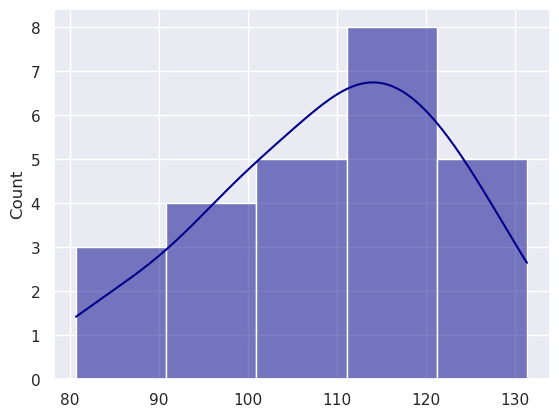

In [11]:
sns.set(color_codes=True)
sns.histplot(sample, kde=True, bins=5, color='darkblue');

Let's say that looks close enough. Now we'll actually set up and run the hypothesis test.

### Step 1: Establish Null and Alternative Hypotheses

As you are trying to monitor a change in the sales performance after the training, the null hypothesis represents what should be your default assumption — that the training did not have the hypothesized impact.

**$H_{0}$:** *The null hypothesis is that the training did not increase sales, so:*

> $H_{0}: \mu \leq 100$

The alternative hypothesis is the one that you are testing. Our alternative hypothesis should address the expected change in the sales performance i.e. the sales performance has increased and the mean of sales post-training is greater than 100. 

**$H_{a}$:** *The alternative hypothesis is that there is a positive change (i.e. the mean sales increased), so:*

> $H_{a}: \mu > 100$

***Why are these hypotheses written with $\mu$ rather than $\bar{x}$?***

Hypotheses are always written in terms of population parameters like $\mu$ rather than sample statistics like $\bar{x}$, because our hypothesis is about a population, not a sample.

What we are really trying to understand here is whether these new sample data come from a *different population* than the one that produced the original $\mu$ of 100.

So, another way we could write the alternative hypothesis would be that $\mu > \mu_{0}$, where $\mu_{0}$ is the original population mean (100) and $\mu$ is the population mean of those who had the new training.

We are using $\bar{x}$ in our calculations determining whether we can reject the null hypothesis, but $\bar{x}$ is not part of the hypotheses.

### Step 2: Choose a Significance Level (Alpha)

Here we'll detour slightly to think some more about what it means to choose a given alpha value. The graphs below are from a different example (not the Acme Ltd. sales data) and are used for illustration purposes.

The significance level, also denoted as alpha or `α`, is the probability of rejecting the null hypothesis when it is true. For example, a significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference. Look at the following graphs for a better understanding: 

<img src="images/P05.png" alt="drawing" width="500px"/>
In the graph above, the two shaded areas are equidistant from the null hypothesis value and each area has a probability of 0.025, for a total of 0.05. In statistics, you call these shaded areas the critical regions for a two-tailed test. If the population mean is 260, you’d expect to obtain a sample mean that falls in the critical region 5% of the time. The critical region defines how far away our sample statistic must be from the null hypothesis value before you can say it is unusual enough to reject the null hypothesis.

In the example shown here, the sample mean (330.6) falls within the critical region, which indicates it is statistically significant at the 0.05 level.

What if we had chosen a level of 0.01 instead?

<img src="images/P01.png" alt="drawing" width="500px"/>

The two shaded areas each have a probability of 0.005, the two of which add up to a total probability of 0.01. This time the sample mean does not fall within the critical region, and you fail to reject the null hypothesis. **This comparison shows why you need to choose your significance level before you begin your study.** It protects you from choosing a significance level because it conveniently gives you significant results!

In theory, a data scientist could determine that their results are statistically significant at the 0.05 level just by visually inspecting a graph like this. However it is more common to use statistical software to compute a p-value, then compare it to the stated significance level, rather than reading a graph.

**For Acme's experiment, you can assume an $\alpha$ of 0.05.**

### Step 3: Calculate the t-statistic

Assuming that we are fulfilling the three requirements for a t-test mentioned above (i.e. normality, independence, and randomness), we are ready to calculate our t statistic using the formula for one-sample t-test given as:

# $$t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$$
 
(The *t-statistic* is also known as the *t-value*.)

Using the formula given above, calculate the t-statistic in Python:

In [12]:
t = (x_bar -  mu)/(sigma/np.sqrt(n))
t
# 3.578139767278185

3.578139767278185

The sample generated a t-statistic of around 3.58. Where in the t-distribution is this located? Let's try visualizing the calculated t-statistic on top of a PDF.

(Note that this is the probability density function for the t-distribution, not the distribution of sales data.)

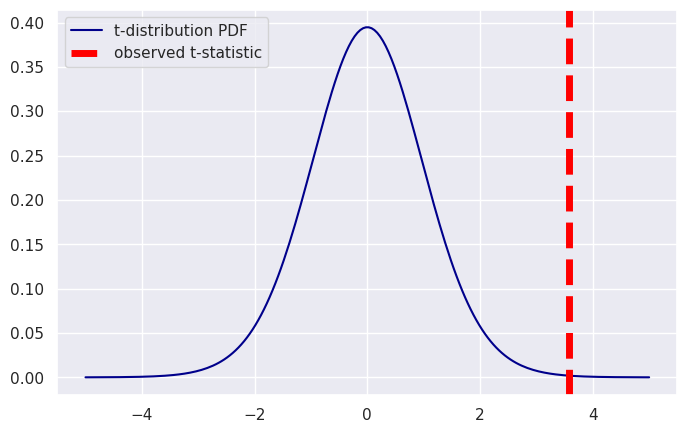

In [13]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(8,5))

# Generate data for plotting the PDF
# (1) generate points on the x axis between -5 and 5:
x = np.linspace(-5, 5, 200)
# (2) use stats.t.pdf to get values on the probability density
# function for the t-distribution
y = stats.t.pdf(x, df, 0, 1)

# Plot the PDF as a line graph
ax.plot(x, y, color='darkblue', label="t-distribution PDF")

# Plot a vertical line for our measured difference in sales t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='observed t-statistic')

ax.legend();

### Step 4: Calculate Critical Value (Find Rejection Region)

Note that a positive t-value indicates that the sample mean is greater than the population mean. This means that the sample's average sales performance post-training is greater than average population sales performance. (We already knew this from our descriptive analysis when we found that $\bar{x} - \mu$ was a positive value, and the t-statistic is just that divided by $\frac{s}{\sqrt{n}}$.)

This sounds like good news, **BUT** is the increase high enough to reject the null hypothesis, which says that there is no significant increase?

We'll answer this question by calculating a critical t-value. It's possible to calculate a critical t-value with a t-table or by using Python `scipy.stats` module.

The critical value approach involves determining "likely" or "unlikely", by determining whether or not the observed test statistic is more extreme than would be expected if the null hypothesis were true. This involves comparing the observed test statistic to some cutoff value, called the **"critical value"**. 
>If the test statistic is more extreme than the critical value, then the null hypothesis is rejected in favor of the alternative hypothesis. If the test statistic is not as extreme as the critical value, then the null hypothesis is not rejected.

You need two values to find this:

The **alpha level**: given as 5% in the question.

You use this alpha level to determine what p-value to look up in this table. In the current example, we are executing a one-tailed t-test because we are only concerned with whether sales *increased*, not whether they were *different* in any way (which would be a two-tailed test). Therefore our p-value is just 0.05, from our 5% alpha.

**Degrees of freedom**, which is the number of items in the sample (n) minus 1: 25 – 1 = 24.

In the table below, look up the df of 24 and p of 0.05:

![t-dist](images/t-dist.png)

Hopefully you found the right value, `1.711`! This is our critical t-value.

You can double-check that this is the right answer using the CDF (cumulative distribution function) of the t-distribution from `scipy.stats`. The CDF gives the probability that the t-statistic will be less than or equal to a given value. In this case, we are plugging in 1.711, our critical t-value:

In [14]:
stats.t.cdf(1.711, df=24)

0.9500110459177917

That checks out! It says that there is a 95% probability that the t-statistic will be less than or equal to 1.711, which is 1 minus our chosen alpha.

More often as a data scientist you will use code to find the critical t-value, rather than looking it up in a table. Conveniently, there is another function from `scipy.stats` that is just the inverse of the CDF shown above, called a PPF. This stands for "percent point function". Given a probability, we use the PPF to compute the corresponding value — in this case, the critical t-value!

(Note that we need to pass in 1 minus alpha, not alpha, because we are finding the t-value where there is a 95% probability we are "right" and 5% probability we are "wrong", not a 5% probability we are "right".)

In [16]:
t_crit = stats.t.ppf(1 - 0.05, df=24)
t_crit

1.7108820799094275

In [25]:
t_crit = stats.t.ppf(1 - 0.05, 24)
t_crit

1.7108820799094275

This is the same critical t-value we found in the table! With more digits, so it looks a little bit different.

The critical t-value marks the boundary of the **rejection region**. Because this is a one-tailed test, we can simply say that the rejection region is anything greater than the critical t-statistic. If our sample t-statistic falls into the rejection region, we can reject the null hypothesis!

We visualize this below:

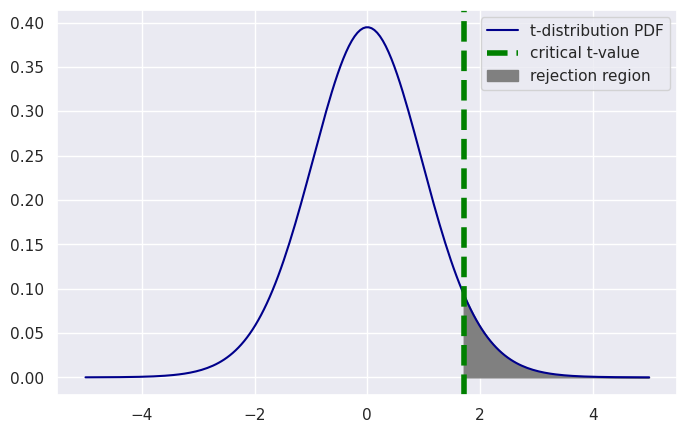

In [17]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(8,5))

# Plot the PDF as a line graph
# (x and y were created in previous plotting code)
ax.plot(x, y, color='darkblue', label="t-distribution PDF")

# Plot a vertical line for our critical t-value
ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')

# Fill area under line graph where x value is creater than critical t
ax.fill_betweenx(y,x,t_crit,where=x > t_crit,color="gray",label="rejection region")

ax.legend();

### Step 5: Compare Sample t-value with Critical t-value: Can We Reject the Null Hypothesis?

We can begin by combining the previous two graphs, to show our observed t-value alongside the critical t-value and rejection region:

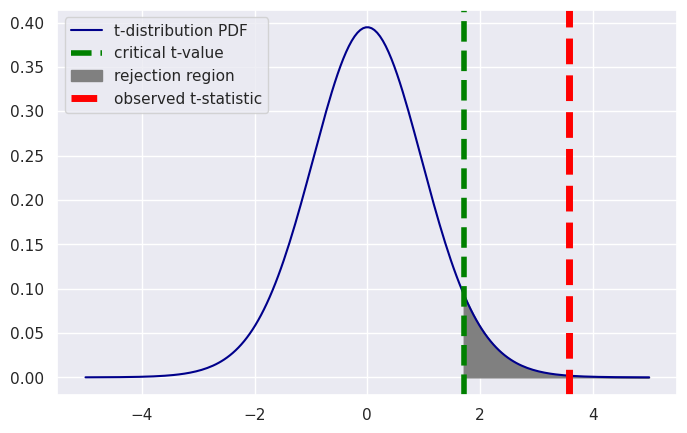

In [18]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(8,5))

# Plot the PDF as a line graph
# (x and y were created in previous plotting code)
ax.plot(x, y, color='darkblue', label="t-distribution PDF")

# Plot a vertical line for our critical t-value
ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')

# Fill area under line graph where x value is creater than critical t
ax.fill_betweenx(y,x,t_crit,where=x > t_crit,color="gray",label="rejection region")

# Plot a vertical line for our measured difference in sales t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='observed t-statistic')

ax.legend();

***Is our observed t-statistic in the rejection region?***

Yes! It's hard to even see the rejection region shading at this extreme part of the distribution, but we are in it. That means we have completed the hypothesis test, and now we only need to interpret the result.

To break down the points:

* Our observed t-statistic is greater than the critical t-value, 
* which means that it is in the rejection region,
* which means that we can reject the null hypothesis at a significance level of 0.05,
* which means that **there was a statistically significant increase in sales performance for those who received the training** (at our specified significance level)

Although it isn't strictly necessary because we already have our answer, we could also calculate a p-value for this test. Recall that the p-value is the probability that we would observe at least this extreme of a t-statistic given that the null hypothesis is actually correct.

One way we could do this would be finding the highest value in the df = 24 row of the lookup table above that is still below our t-statistic, then reporting that column. This tends to be fairly imprecise. It appears that our p-value is somewhere between 0.001 and 0.0005, since our t-statistic is between 3.467 and 3.745. If the details aren't important, you could just report this as $p < 0.001$.

Alternatively, there is functionality within `scipy.stats` to find a more precise p-value using the "survival function" SF:

In [16]:
p_value = stats.t.sf(t, df=24)
p_value

0.0007589472707557043

So, our p-value is about 0.00076, meaning that if the null hypothesis is correct (that there was no increase in sales performance with the training), we would expect it to produce results like we observed 0.076% of the time — very improbable!

Given our alpha of 0.05, this p-value is smaller than our alpha, therefore we can again say that we reject the null hypothesis at a significance level of 0.05.

## A Simpler Process with `ttest_1samp`

Going through step by step and creating those visualizations is useful for teaching and learning the steps of conducting a t-test, but there are tools to make the process a lot faster once you understand how it works. Going forward, you'll usually want to use these tools rather than the process shown above.

Specifically, there are t-test functions built into `scipy.stats`!

To repeat the above test, we are again conducting a one-sample, one-sided t-test, so we will want to use `ttest_1samp`.

We are still using these hypotheses:

$ H_{0}: \mu \leq 100 $

$ H_{a}: \mu > 100 $

and $\alpha = 0.05$.

First, we pass the sample data and the mean we are using for comparison into the function. Note that we are **not** passing in the alpha value, so there will be one additional step to determine whether we reject the null hypothesis after this step.

In [20]:
results = stats.ttest_1samp(
    a=sample,   # the entire array-like sample
    popmean=100 # the mean you are testing the sample against
)

results

Ttest_1sampResult(statistic=3.578139767278185, pvalue=0.0015178945415114085)

This `results` variable contains both the t-statistic and the p-value. Below we compare the t-statistic from this calculation to the one we calculated earlier:

In [21]:
print(t)
print(results.statistic)

3.578139767278185
3.578139767278185


We can either use the t-statistic and rejection region approach next, or we can just use the p-value!

### Rejection Region Approach with `ttest_1samp`

One approach would be to compute the critical t-value, then compare the t-value from our `ttest_1samp` results to that critical t-value.

In [22]:
alpha = 0.05

t_crit = stats.t.ppf(1 - alpha, df=len(sample)-1)

if results.statistic > t_crit:
    print("Null hypothesis rejected.")
    print("The increase in sales performance is statistically significant at the", alpha, "level.")
else:
    print("Failed to reject the null hypothesis.")
    print("The increase in sales performance is not statistically significant at the", alpha, "level.")

Null hypothesis rejected.
The increase in sales performance is statistically significant at the 0.05 level.


### p-value Approach with `ttest_1samp`

The code for this is simpler (because you don't have to calculate a critical t), although conceptually it is a bit more complicated.

The `ttest_1samp` function assumes that you are performing a *two-sided* one-sample t-test. This means that when you specify a mean of 100, it assumes your null hypothesis is $\mu = 100$ and your alternative hypothesis is $\mu \neq 100$. This doesn't affect the t-statistic, but it does affect the p-value.

Let's look at that more closely:

In [20]:
print(p_value)
print(results.pvalue)

0.0007589472707557043
0.0015178945415114085


The p-value from `results` looks like it's twice as large as the one we calculated! In fact, it's exactly twice as large:

In [21]:
print(p_value)
print(results.pvalue / 2)

0.0007589472707557043
0.0007589472707557043


In this case with very small p-values it doesn't affect our answer either way — both 0.0015 and 0.00076 are smaller than 0.05.

But in other cases this difference in p-values could mean the difference between rejecting and failing to reject the null hypothesis!

So, what should we do?

Simply **divide the p-value result from `ttest_1samp` by 2 if you are using it for a one-sided t-test**. If you are using it for a two-sided t-test, no further action is required.

In conclusion, we can use the p-value from `ttest_1samp` to answer our research question like this:

In [23]:
if (results.pvalue / 2) < alpha:
    print("Null hypothesis rejected.")
    print("The increase in sales performance is statistically significant at the", alpha, "level.")
else:
    print("Failed to reject the null hypothesis.")
    print("The increase in sales performance is not statistically significant at the", alpha, "level.")

Null hypothesis rejected.
The increase in sales performance is statistically significant at the 0.05 level.


That was easy! This p-value approach meant that we never had to calculate the critical t, we just handed the work over to SciPy. It was conceptually a bit more challenging but the code was shorter.

Unless you are specifically instructed to use one approach or the other (rejection region or p-value), either one works well.

Also, note that you might also see a couple different techniques for extracting information from the t-test results object. It is designed so you can use dot notation or indexing notation to retrieve the same values:

In [24]:
print("results.statistic:", results.statistic)
print("results[0]:       ", results[0])
print("results.pvalue:   ", results.pvalue)
print("results[1]:       ", results[1])

results.statistic: 3.578139767278185
results[0]:        3.578139767278185
results.pvalue:    0.0015178945415114085
results[1]:        0.0015178945415114085


## Summary

In this lesson, you saw a quick introduction to hypothesis testing using frequentists methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these steps in Python.